# Makerere University Admissions Data: Regional & College-Level Insights
This notebook performs data cleaning, enhancement, and visualization to analyze student admissions by region, district, gender, and college.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load cleaned data
df = pd.read_excel('cleaned_clustered_admissions.xlsx')

# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
df['dname'] = df['dname'].str.upper().str.strip()
df['ge'] = df['ge'].str.upper().str.strip()

In [6]:
# Map regions
region_map = {
    "CENTRAL": [
        "BUIKWE", "BUKOMANSIMBI", "BUTAMBALA", "BUVUMA", "GOMBA", 
        "KALANGALA", "KALUNGU", "KAMPALA", "KAYUNGA", "KIBOGA", 
        "KYANKWANZI", "LUWEERO", "LWENGO", "LYANTONDE", "MASAKA", 
        "MITYANA", "MPIGI", "MUBENDE", "MUKONO", "NAKASEKE", 
        "NAKASONGOLA", "RAKAI", "SSEMBABULE", "WAKISO", "KYOTERA", 
        "KASSANDA"
    ],
    "EASTERN": [
        "AMURIA", "BUDAKA", "BUDUDA", "BUGIRI", "BUKEDAEA", 
        "BULAMBULI", "BUSIA", "BUTALEJA", "BUTAMBO", "BUYENDE", 
        "IGANGA", "JINJA", "KALIRO", "KAPCHORWA", "KATATWI", 
        "KUMI", "KAPEBYONG", "MAYUGE", "MBALE", "NAMAYINGO", 
        "NAMUTUMBA", "NGORA", "SERERE", "SIRONKO", "SOROTI", 
        "TOREO", "BUTIEBO", "NAMISINDWA", "LAUKA", 
    ],
    "NORTHERN": [
        "ABIM", "ADJUMANI", "AGAGO", "ALEBTONG", "AMOLATAR", 
        "AMUDAT", "AMURU", "APAC", "ARUA", "DOKOLO", "GULU", 
        "KAAABONG", "KARANGA", "KITGUM", "KOBOKO", "KOLE", 
        "KOTIDO", "KUMI", "KWANIA", "KWEEN", "LIRA", "MADI OKOLLO", 
        "MARACHA", "MOROTO", "MOYO", "NABILATUK", "NAKAPIRIPIRIT", 
        "NAPAK", "NEBBI", "NTOOOROKO", "NTOROKO", "NWOOYA", "OBONGI", 
        "OMORO", "OTUKE", "OYAM", "PADER", "PAKWACH", "YUMBE", "ZOMBO"
    ],
    "WESTERN": [
        "BUHWEJU", "BULIISA", "BUNDIBUGYO", "BUSHENYI", "HOIMA", 
        "IBANDA", "ISINGIRO", "KABALE", "KABAROLE", "KAMWENGE", 
        "KANUNGU", "KASESE", "KIBAALE", "KIKUUBE", "KIRUHURA", 
        "KIRYANDONGO", "KISORO", "KYEGEGWA", "KYENJOJO", "LAMWO", 
        "LWEERO", "LWENGO", "MASHINDI", "MBARARA", "MITOOMA", 
        "MTUNGAMO", "NTUNGAMO", "NTOOKO", "RUBANDA", "RUBIRIZI", 
        "RUKIGA", "RUKUNGIRI", "SEMBABULE", "SHEEMA"
    ],
}

def map_region(dname):
    for region, districts in region_map.items():
        if dname in districts:
            return region
    return 'UNKNOWN'

df['region'] = df['dname'].apply(map_region)

In [7]:
df[['course_code', 'course_name']].drop_duplicates().sort_values(by='course_code')

,course_code,course_name
0,ACC,BSC. Accounting (EVE)
271,ADA,B.Business Administration (Afternoon)
389,ADJ,B.Business Administration(Jinja)
408,ADM,Bachelor of Business Administration
524,AGE,BSC Agricultural Engineering
...,...,...
18965,SSM,B. Sports Science (Sports Management)
18994,STA,Bachelor of Statistics
19140,TLM,B.Transport and Logistics Management (EVE)
19458,TTM,B.Travel and Tourism Management (EVE)


In [8]:
# Extract unique courses and names
courses_offered = df[['course_code', 'course_name']].drop_duplicates().sort_values(by='course_code')

# Save to Excel
courses_offered.to_excel("courses_offered.xlsx", index=False)


In [9]:
# Map colleges
college_map = {
    "CAES": [  # CAES
        "BAGRIC",
        "BLESA",
        "BAM",
        "BFOOD",
        "BENV",
        "BVS",
        "AGR",
        "AGM",
        "AGE",
        "BOF",
        "BHD",
        "BFS",
        "BGS",
    ],
    "CASS": [  # CASS
        "BA",
        "BPA",
        "BSW",
        "BCJ",
        "BHRM",
        "BPS",
        "BEDS",
        "ARS",
        "MUS",
        "APS",
        "APY",
        "DPA",
        "JCA",
        "BJC",
        "BJE",
    ],
    "CEDAT": [  # CEDAT
        "BENG",
        "BSCE",
        "BME",
        "BSE",
        "BSM",
        "BARCH",
        "BLD",
        "SURV",
        "QUA",
        "BFA",
        "ARC",
        "MEC",
        "CCE",
        "CIV",
        "LSG",
        "SQS",
        "BVL",
        "BWE",
        "BPG",
    ],
    "CEES": [  # CEES
        "BED",
        "BEED",
        "BTE",
        "BAED",
        "BSL",
        "EDA",
        "EDB",
        "EDP",
        "EEC",
        "ECO",
        "ECE",
        "ECN",
    ],
    "CHS": [  # CHS
        "MBCHB",
        "BDS",
        "BNS",
        "BCH",
        "BPHARM",
        "MLS",
        "BMR",
        "BNA",
        "BYT",
        "NUR",
        "MLT",
        "BOS",
        "SLT",
        "BPT",
    ],
    "CHUSS": [  # CHUSS
        "BA",
        "BCJ",
        "BHRM",
        "BPA",
        "BSW",
        "ASS",
        "ASE",
        "BEN",
        "BEY",
        "BAC",
        "BAP",
        "BLG",
        "BLM",
        "LGM",
        "LIS",
        "BYW",
    ],
    "COBAMS": [  # COBAMS
        "BCOM",
        "BBA",
        "BECO",
        "BSTAT",
        "BBAM",
        "BSAS",
        "BBC",
        "BBD",
        "BBE",
        "BBJ",
        "BJS",
        "BAC",
        "BBC",
        "BSI",
        "BSJ",
        "BST",
        "BUS",
        "BRM",
        "BRJ",
        "BRO",
        "BSA",
        "BSF",
        "BMS",
        "BKE",
        "BIB",
        "BIM",
        "BOM",
        "BML",
        "BMM",
        "BNM",
        "BOF",
        "BNE",
        "BTB",
        "BIB",
        "BIM",
        "BMS",
        "PML",
        "PMM",
        "PNM",
        "PSM",
        "PSC",
        "PSU",
        "PMA",
        "HMA",
        "HML",
        "HNM",
        "HOM",
        "HSJ",
        "HSO",
    ],
    "COCIS": [  # COCIS
        "BIT",
        "BIS",
        "BIST",
        "BLIS",
        "BCS",
        "CSC",
        "CSE",
        "CSJ",
        "BSW",
        "SSE",
    ],
    "COVAB": [  # COVAB
        "BVM",
        "BLT",
        "BLBM",
        "BJA",
        "BLB",
    ],
    "CNS": [  # CNS
        "BSC",
        "BSCM",
        "BSTA",
        "BSAS",
        "BAM",
        "BST",
        "SCB",
        "SCP",
        "SCX",
        "SEC",
        "SAS",
        "STA",
        "BBI",
        "BIC",
        "BBT",
        "BBP",
    ],
    "LAW": [  # LAW
        "LLB"
    ],
}

def get_college(course_name):
    for college, programs in college_map.items():
        if course_name in programs:
            return college
    return 'Other'

df['college'] = df['course_name'].apply(get_college)

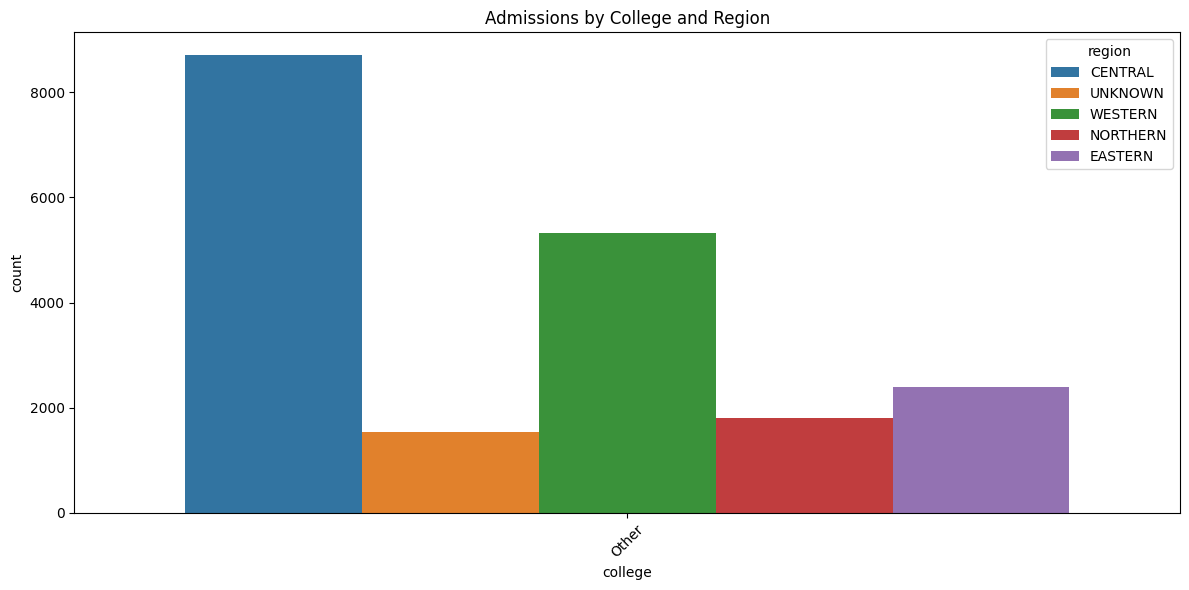

In [10]:
# Visualize by college and region
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='college', hue='region')
plt.title('Admissions by College and Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:
def map_college(course_code):
    return college_map.get(course_code, "OTHER")
# Create a mapping of course codes to colleges


In [12]:
df['college'] = df['course_code'].apply(map_college)

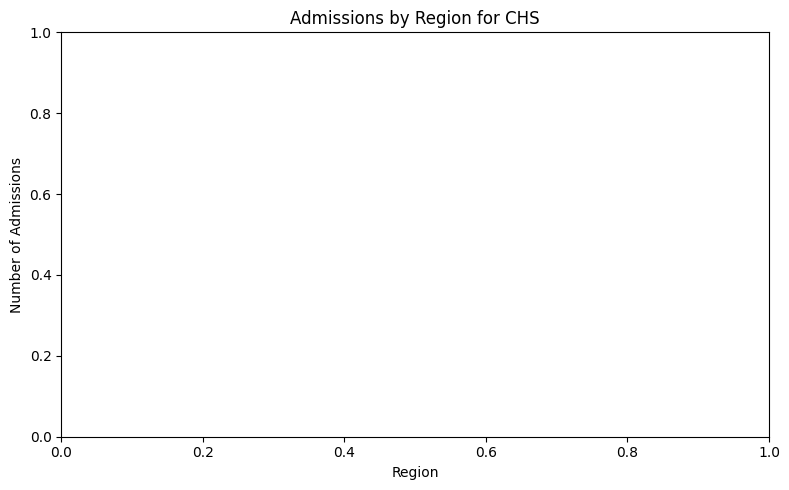

In [13]:
# Filter for CHS only
chs_df = df[df['college'] == 'chs']

# Plot CHS admissions by region
plt.figure(figsize=(8,5))
sns.countplot(data=chs_df, x='region', palette='Set2')
plt.title('Admissions by Region for CHS')
plt.xlabel('Region')
plt.ylabel('Number of Admissions')
plt.tight_layout()
plt.show()


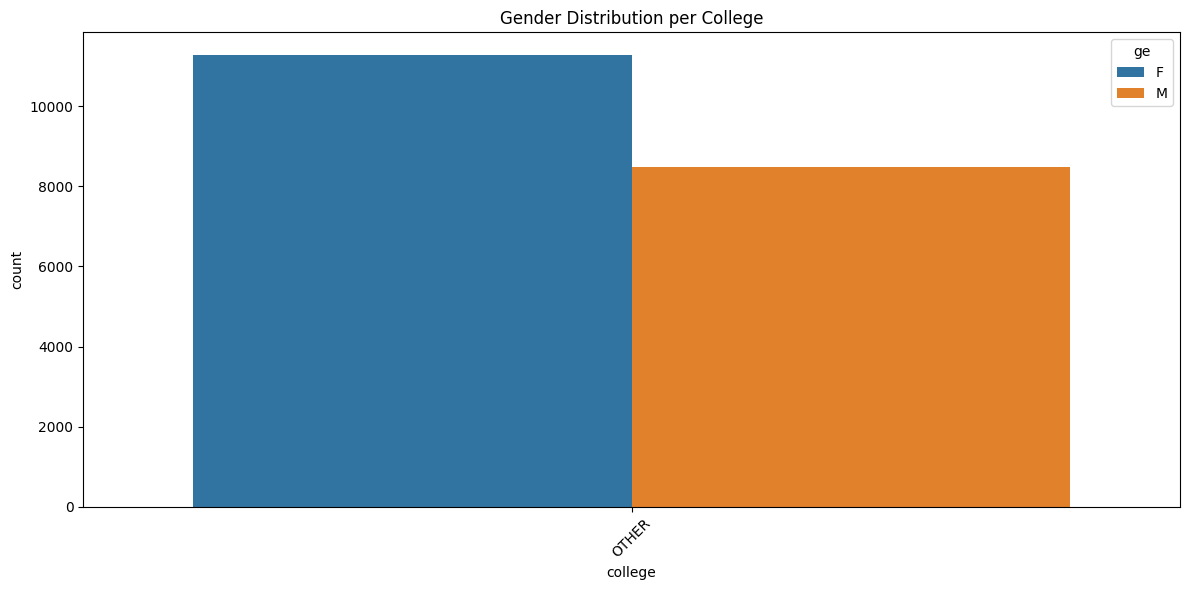

In [14]:
# Visualize gender per college
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='college', hue='ge')
plt.title('Gender Distribution per College')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

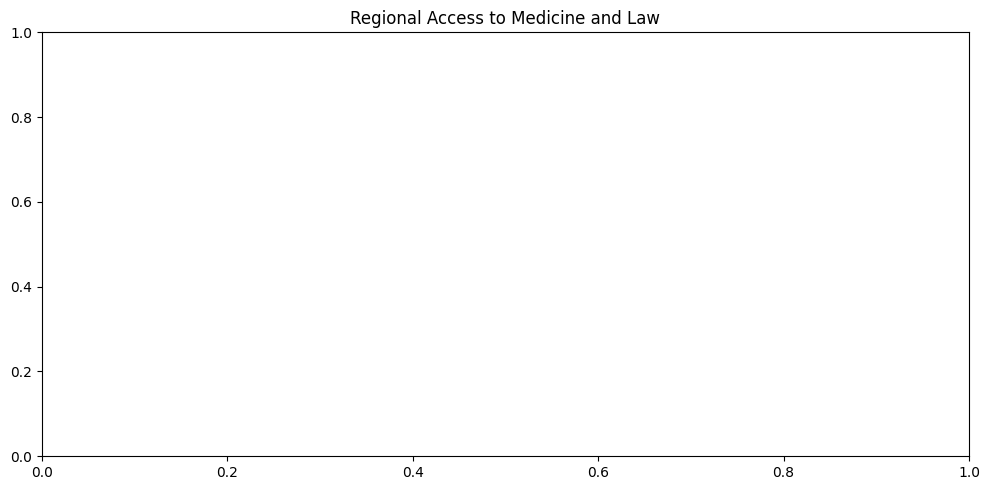

In [15]:
# Region access to professional courses (Medicine & Law)
prof_courses = df[df['college'].isin(['chs', 'Law'])]
plt.figure(figsize=(10,5))
sns.countplot(data=prof_courses, x='college', hue='region')
plt.title('Regional Access to Medicine and Law')
plt.tight_layout()
plt.show()